In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

5
(150, 70)


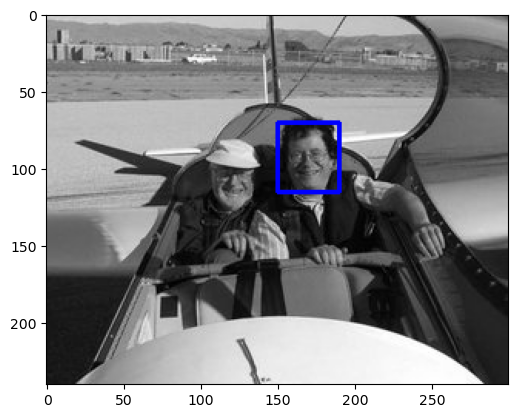

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#match_method = cv2.TM_SQDIFF
# match_method = cv2.TM_SQDIFF_NORMED
# match_method = cv2.TM_CCORR
# match_method = cv2.TM_CCORR_NORMED
# match_method = cv2.TM_CCOEFF
match_method = cv2.TM_CCOEFF_NORMED
use_mask = False

mask  = None

# -------------------------------------------------------
# load src image
img_fstr  = '/home/tkd_010/ImageProcessing/data/images/Template_Matching_Original_Image.jpg'
img   = cv2.imread(img_fstr , cv2.IMREAD_COLOR)

# -------------------------------------------------------
# template matching은 scale 및 이미지 값에 영향을 크게 받음.
# 가급적 image에서 선택하여 잘라야 함.
templ = img[70:115,150:190,...].copy()
# templ_fstr  = '/home/tkd_010/ImageProcessing/data/images/Template_Matching_Template_Image.jpg'
# templ   = cv2.imread(templ_fstr , cv2.IMREAD_COLOR)


# plt.imshow(templ[...,::-1])

# -------------------------------------------------------
# generate mask
if use_mask:
  mask = np.ones(img.shape)

# -------------------------------------------------------
# matching!!
method_accepts_mask = (cv2.TM_SQDIFF == match_method or cv2.TM_CCORR_NORMED == match_method )
if (use_mask and method_accepts_mask):
  result = cv2.matchTemplate(img, templ, match_method, None, mask)
else:
  result = cv2.matchTemplate(img, templ, match_method)

# -------------------------------------------------------
# get the coordinate of matching point
cv2.normalize( result, result, 0, 1, cv2.NORM_MINMAX, -1 )
plt.imshow(result,cmap='gray')
_minVal, _maxVal, minLoc, maxLoc = cv2.minMaxLoc(result, None)
if (match_method == cv2.TM_SQDIFF or match_method == cv2.TM_SQDIFF_NORMED):
  print(match_method)
  matchLoc = minLoc
else:
  print(match_method)
  matchLoc = maxLoc
  
  # -------------------------------------------------------
# display
print(matchLoc)
img_display = img.copy()
color_line = (255,0,0)
thickness = 2
line_type = 8

cv2.rectangle(img_display, matchLoc, (matchLoc[0] + templ.shape[1], matchLoc[1] + templ.shape[0]), color_line,thickness, line_type)

plt.imshow(img_display[...,::-1]);

image를 padding 하고 -->  template matching을 해야 됨 (rectangle 빗겨나감 최소화)

# Average Hashing Matching

In [32]:
import cv2
import numpy as np


img_fstr  = '/home/tkd_010/ImageProcessing/data/images/Template_Matching_Original_Image.jpg'
img = cv2.imread(img_fstr , 0)
print(img.shape)
img = cv2.resize(img, (30,24))

avg = np.average(img)

hashing_img = (avg > img) * 1

np.set_printoptions(threshold=1000, linewidth=np.inf)
print(hashing_img)

(240, 300)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1]
 [1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 